In [1]:
import pandas as pd

In [2]:
movies=pd.read_csv('E:\data\imdb_movies\movie.csv')

In [3]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [4]:
movies.shape

(27278, 3)

In [8]:
tags=pd.read_csv('tag.csv')

In [33]:
tags.head(1)

,userId,movieId,tag
0,18,4141,Mark Waters


In [34]:
ratings=pd.read_csv('rating.csv')
ratings.head(1)

,userId,movieId,rating,timestamp
0,1,2,3.5,2005-04-02 23:53:47


In [37]:
# del ratings['timestamp']
# del tags['timestamp']

KeyError: 'timestamp'

In [14]:
row_0 = tags.iloc[0]
type(row_0)

pandas.core.series.Series

In [15]:
print(row_0)

userId              18
movieId           4141
tag        Mark Waters
Name: 0, dtype: object


In [16]:
row_0.index

Index(['userId', 'movieId', 'tag'], dtype='object')

In [17]:
row_0['userId']

np.int64(18)

In [18]:
'rating' in row_0

False

In [19]:
row_0.name

0

In [20]:
row_0 = row_0.rename('firstRow')
row_0.name

'firstRow'

In [21]:
tags.head()

,userId,movieId,tag
0,18,4141,Mark Waters
1,65,208,dark hero
2,65,353,dark hero
3,65,521,noir thriller
4,65,592,dark hero


In [22]:
tags.index

RangeIndex(start=0, stop=465564, step=1)

In [23]:
tags.columns

Index(['userId', 'movieId', 'tag'], dtype='object')

In [24]:
tags.iloc[ [0,11,500] ]

,userId,movieId,tag
0,18,4141,Mark Waters
11,65,1783,noir thriller
500,342,55908,entirely dialogue


In [38]:
ratings

,userId,movieId,rating
0,1,2,3.5
1,1,29,3.5
2,1,32,3.5
3,1,47,3.5
4,1,50,3.5
...,...,...,...
20000258,138493,68954,4.5
20000259,138493,69526,4.5
20000260,138493,69644,3.0
20000261,138493,70286,5.0


In [39]:
ratings['rating'].describe()

count    2.000026e+07
mean     3.525529e+00
std      1.051989e+00
min      5.000000e-01
25%      3.000000e+00
50%      3.500000e+00
75%      4.000000e+00
max      5.000000e+00
Name: rating, dtype: float64

In [40]:
ratings.describe()

,userId,movieId,rating
count,2.000026e+07,2.000026e+07,2.000026e+07
mean,6.904587e+04,9.041567e+03,3.525529e+00
std,4.003863e+04,1.978948e+04,1.051989e+00
min,1.000000e+00,1.000000e+00,5.000000e-01
25%,3.439500e+04,9.020000e+02,3.000000e+00
50%,6.914100e+04,2.167000e+03,3.500000e+00
75%,1.036370e+05,4.770000e+03,4.000000e+00
max,1.384930e+05,1.312620e+05,5.000000e+00


In [41]:
ratings['rating'].mean()

np.float64(3.5255285642993797)

In [42]:
ratings.mean()

userId     69045.872583
movieId     9041.567330
rating         3.525529
dtype: float64

In [43]:
ratings['rating'].min()

0.5

In [44]:
ratings['rating'].max()

5.0

In [45]:
ratings['rating'].std()

1.051988919275684

In [46]:
ratings['rating'].mode()

0    4.0
Name: rating, dtype: float64

In [47]:
ratings.corr()

,userId,movieId,rating
userId,1.000000,-0.000850,0.001175
movieId,-0.000850,1.000000,0.002606
rating,0.001175,0.002606,1.000000


In [48]:
filter1=ratings['rating']>10
print(filter1)
filter1.any()

0           False
1           False
2           False
3           False
4           False
            ...  
20000258    False
20000259    False
20000260    False
20000261    False
20000262    False
Name: rating, Length: 20000263, dtype: bool


np.False_

In [49]:
filter2=ratings['rating']>0
filter2.all()

np.True_

# Data Cleaning: Handling Missing data

In [52]:
movies.shape

(27278, 3)

In [55]:
movies.isna()

,movieId,title,genres
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
27273,False,False,False
27274,False,False,False
27275,False,False,False
27276,False,False,False


In [57]:
movies.isnull().any()

movieId    False
title      False
genres     False
dtype: bool

In [58]:
movies.isnull().any().any() # no null value is present

np.False_

In [59]:
ratings.shape

(20000263, 3)

In [60]:
ratings.isna().any()

userId     False
movieId    False
rating     False
dtype: bool

In [61]:
ratings.isna().any().any()

np.False_

In [62]:
tags.shape

(465564, 3)

In [63]:
tags.isnull().any().any() # here missing values is present

np.True_

In [64]:
tags=tags.dropna()

In [65]:
tags.isna().any().any()

np.False_

In [66]:
tags.shape # no missing value is present

(465548, 3)

# Data Visualization

In [73]:
%matplotlib inline
import matplotlib.pyplot as plt


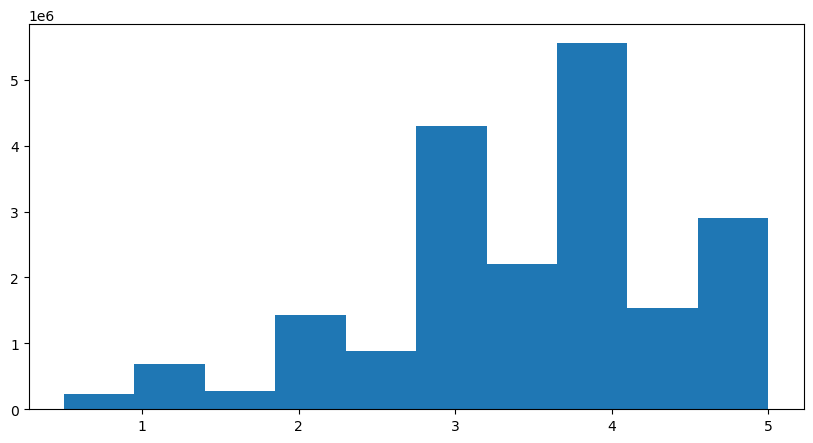

In [80]:
plt.figure(figsize=[10,5])
plt.hist(data=ratings,x='rating')
plt.show()

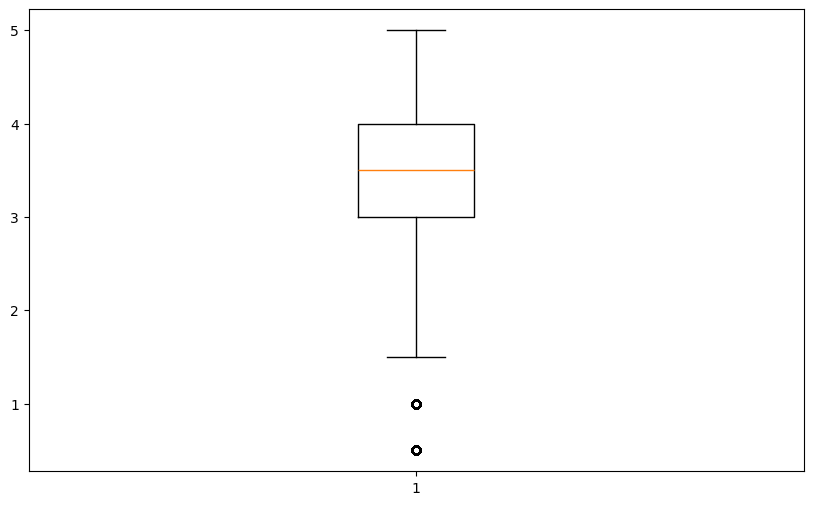

In [85]:
plt.figure(figsize=[10,6])
plt.boxplot(data=ratings,x='rating')
plt.show()

# Slicing Out Columns

In [86]:
tags['tag'].head()

0      Mark Waters
1        dark hero
2        dark hero
3    noir thriller
4        dark hero
Name: tag, dtype: object

In [87]:
movies[['title','genres']].head()

,title,genres
0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,Jumanji (1995),Adventure|Children|Fantasy
2,Grumpier Old Men (1995),Comedy|Romance
3,Waiting to Exhale (1995),Comedy|Drama|Romance
4,Father of the Bride Part II (1995),Comedy


In [88]:
ratings[-10:]

,userId,movieId,rating
20000253,138493,60816,4.5
20000254,138493,61160,4.0
20000255,138493,65682,4.5
20000256,138493,66762,4.5
20000257,138493,68319,4.5
20000258,138493,68954,4.5
20000259,138493,69526,4.5
20000260,138493,69644,3.0
20000261,138493,70286,5.0
20000262,138493,71619,2.5


In [89]:
tag_counts=tags['tag'].value_counts()
tag_counts[-10:]

tag
Hell naw                      1
This is my happy face         1
I heel toe on Uday's house    1
Why?                          1
Bobo                          1
Diamond Dallas Page           1
I'm Devon Butler!             1
No arguement                  1
Really Bad                    1
Botox                         1
Name: count, dtype: int64

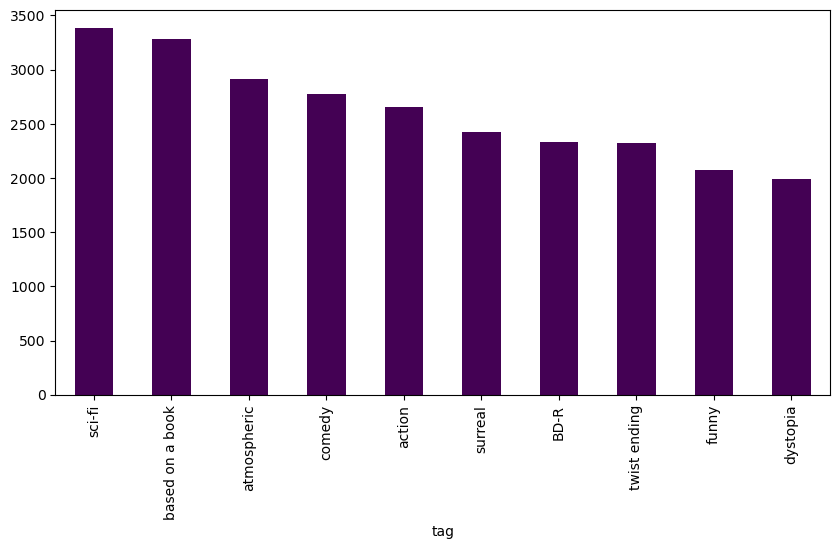

In [117]:
tag_counts[:10].plot(kind='bar', figsize=(10,5),cmap='viridis')
plt.show()

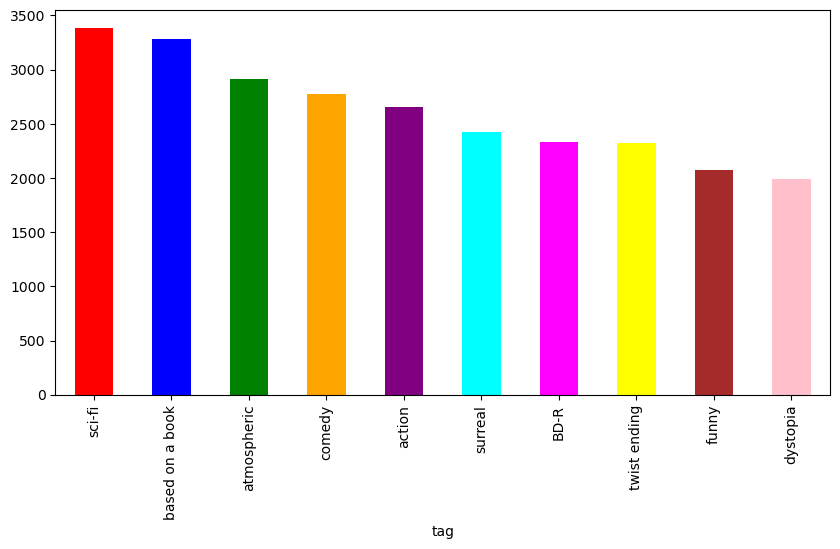

In [118]:
import matplotlib.pyplot as plt

colors = ['red', 'blue', 'green', 'orange', 'purple',
          'cyan', 'magenta', 'yellow', 'brown', 'pink']

tag_counts[:10].plot(
    kind='bar',
    figsize=(10,5),
    color=colors
)

plt.show()
